# Chapter 3 Linear Regression

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
import statsmodels.api as sm
import numpy as np
from ISLP.models import (ModelSpec as MS, summarize)
from statsmodels.stats.anova import anova_lm


## Exercise 8

8. This question involves the use of simple linear regression on the Auto
data set.
(a) Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:
i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and
the response?
iii. Is the relationship between the predictor and the response
positive or negative?

In [3]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [3]:
X=pd.DataFrame({'intercept':np.ones(Auto.shape[0]),'horsepower':Auto['horsepower']})
y=Auto['mpg']
model= sm.OLS(y,X)
results = model.fit()

In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           7.03e-81
Time:                        17:59:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. ii. yes There is a relationship between the predictor and the response with medium intensity since there is an R-squared of 0.6.
iii. The realtionship is negative more horsepower implies less mpg.

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

In [5]:
new_X=pd.DataFrame({'intercept':[1],'horsepower':[98]})
results.predict(new_X)

0    24.467077
dtype: float64

In [6]:
prediction = results.get_prediction(new_X)
print(prediction.summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


(b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

In [7]:
def abline(ax, b,m):
    xlim = ax.get_xlim()
    ylim= [m*xlim[0] + b, m*xlim[1] + b]
    ax.plot(xlim, ylim)

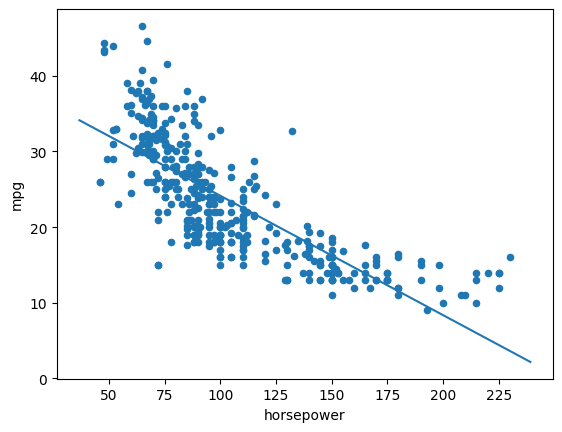

In [12]:
ax = Auto.plot.scatter(x='horsepower', y='mpg')
abline(ax, results.params['intercept'], results.params['horsepower'])

(c) Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

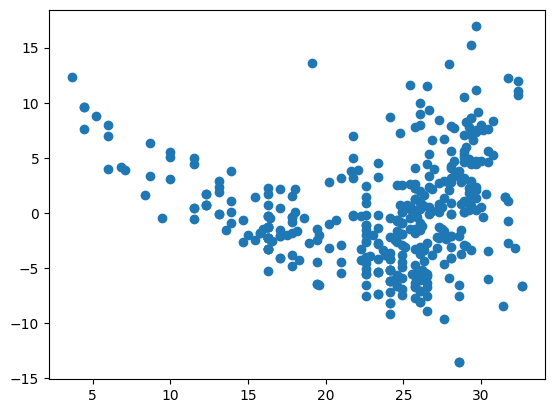

In [17]:
plt.scatter(results.fittedvalues, results.resid)
plt.show()

The residual plot is clearlt non symetrical with respect to x axis, is clear that there are better models that can fit in this situation, a logaritmic scale for example.

## Exercise 9

This question involves the use of multiple linear regression on the
Auto data set.
(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

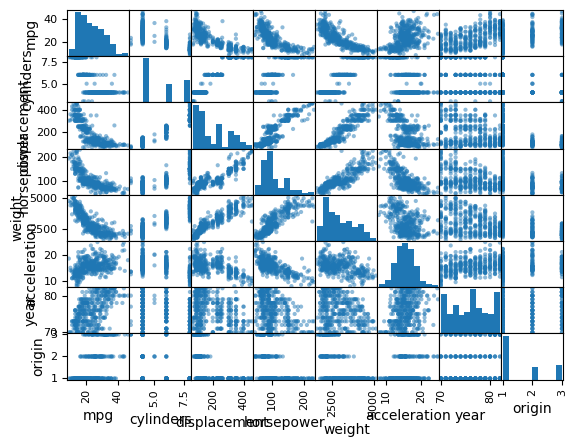

In [4]:
pd.plotting.scatter_matrix(Auto);

(b) Compute the matrix of correlations between the variables using
the DataFrame.corr() method.

In [5]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output. For instance:
i. Is there a relationship between the predictors and the response?
Use the anova_lm() function from statsmodels to
answer this question.

In [ ]:
X = MS(Auto.columns.drop('mpg')).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          2.04e-139
Time:                        18:24:08   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yes there's a strong relation since the prob of the F-statistic is 2.04e-139.

ii. Which predictors appear to have a statistically significant
relationship to the response? displacement, weight, year and origin

iii. What does the coefficient for the year variable suggest? That the most recent the biggest the mpg

(d) Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?